In [98]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [99]:
copenhagen = pd.read_csv('/Users/jyots/Desktop/DSI-SF-4-Jyojha/Capstone_Project/airbnb_DataSets/Airbnb listings in Copenhagen (June 2016).csv',
                   encoding='utf8')

In [100]:
copenhagen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14590 entries, 0 to 14589
Data columns (total 16 columns):
Unnamed: 0              14590 non-null int64
room_id                 14590 non-null int64
host_id                 14590 non-null int64
room_type               14588 non-null object
borough                 0 non-null float64
neighborhood            14590 non-null object
reviews                 14590 non-null int64
overall_satisfaction    7993 non-null float64
accommodates            14590 non-null int64
bedrooms                14571 non-null float64
bathrooms               13673 non-null float64
price                   14588 non-null float64
minstay                 14426 non-null float64
latitude                14590 non-null float64
longitude               14590 non-null float64
collected               14590 non-null object
dtypes: float64(8), int64(5), object(3)
memory usage: 1.8+ MB


In [101]:
copenhagen = copenhagen[copenhagen['price'].notnull()]

In [102]:
copenhagen.drop('borough', axis=1, inplace=True)

In [103]:
copenhagen = copenhagen[copenhagen['room_type'].notnull()]

In [104]:
copenhagen.neighborhood.unique()

array([u'Indre By', u'Vesterbro-Kongens Enghave', u'N\ufffdrrebro',
       u'Amager Vest', u'\ufffdsterbro', u'Amager \ufffdst', u'Bispebjerg',
       u'Br\ufffdnsh\ufffdj-Husum', u'Valby', u'Vanl\ufffdse'], dtype=object)

In [105]:
copenhagen.neighborhood.replace(u'N\ufffdrrebro',u'Norrebro',inplace=True)
copenhagen.neighborhood.replace(u'\ufffdsterbro',u'Osterbro',inplace=True)
copenhagen.neighborhood.replace(u'Amager \ufffdst',u'Amager East',inplace=True)
copenhagen.neighborhood.replace(u'Br\ufffdnsh\ufffdj-Husum',u'Bronshoj-Husum',inplace=True)
copenhagen.neighborhood.replace(u'Vanl\ufffdse',u'Vanlose',inplace=True)

In [106]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(copenhagen.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [107]:
df1 = df1.reset_index(level = 0)
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [108]:
df1.head(2)

,neighborhood,reviews,host_id,price
5,Norrebro,29095,3336,100.765288
9,Vesterbro-Kongens Enghave,24146,2587,116.562041


In [109]:
copenhagen.room_type.value_counts()

Entire home/apt    12047
Private room        2472
Shared room           69
Name: room_type, dtype: int64

In [110]:
df1.sort_values('neighborhood',inplace=True)

In [111]:
df1 = df1.reset_index()

In [112]:
df1.head(2)

,index,neighborhood,reviews,host_id,price
0,0,Amager East,7378,1048,107.666031
1,1,Amager Vest,9739,1392,120.121408


In [113]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [114]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

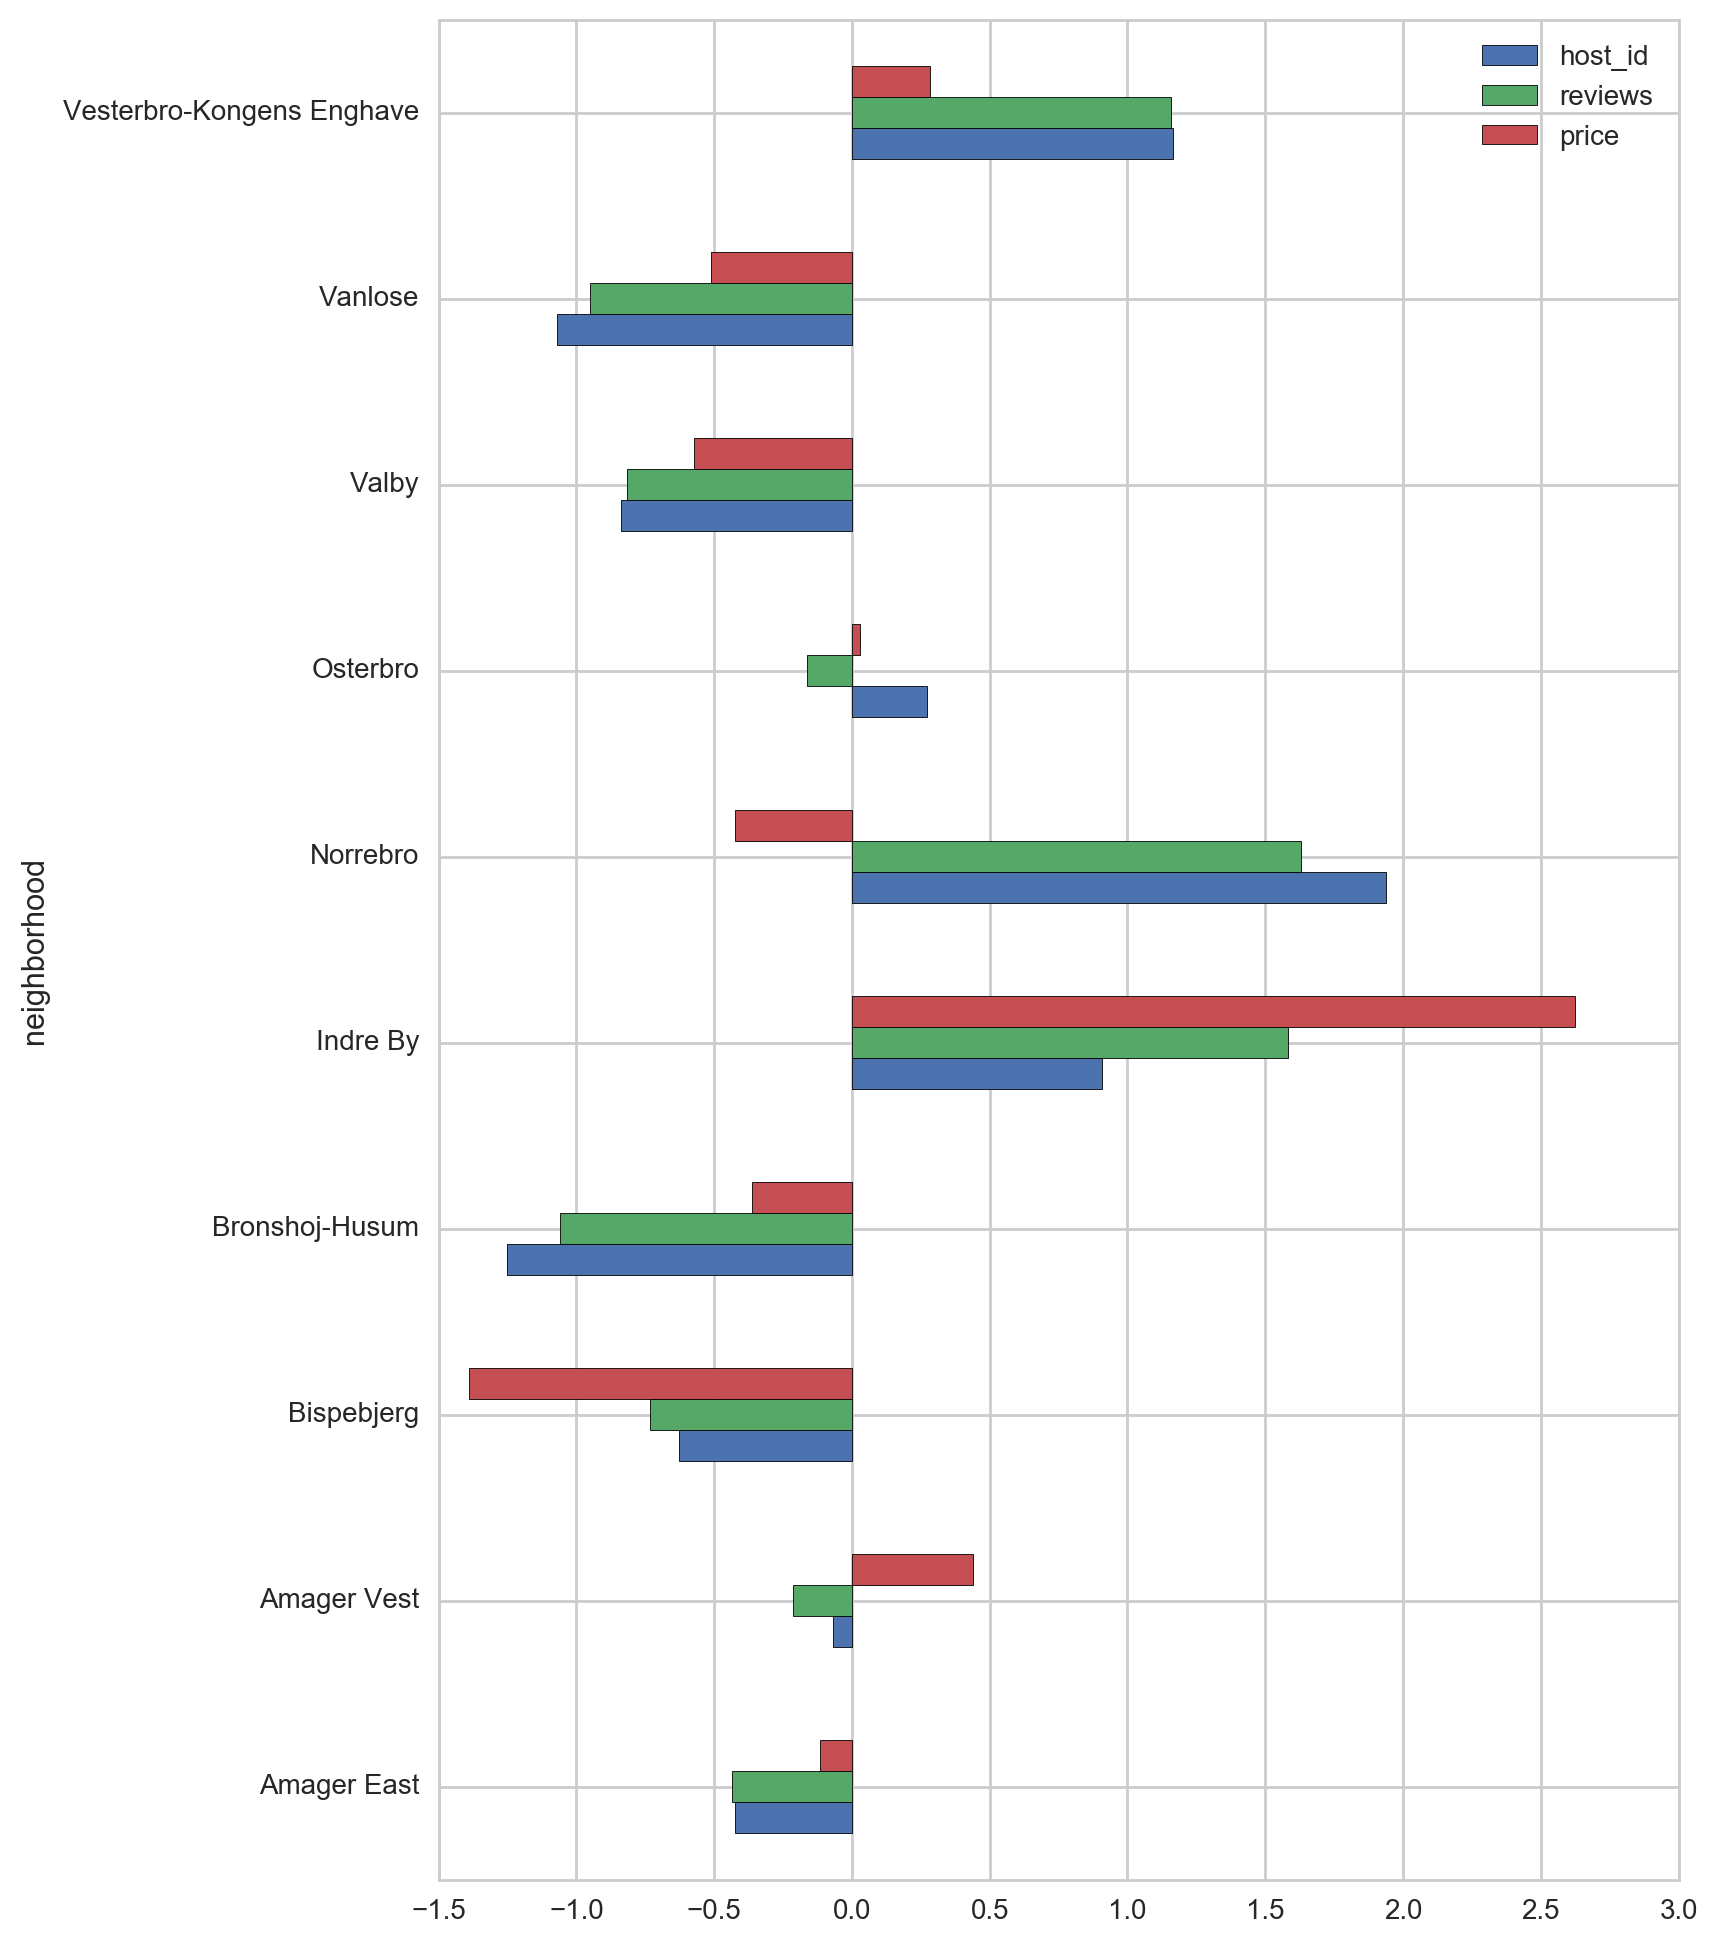

In [115]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12))

In [116]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(copenhagen.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [117]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [118]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)
df2.head()

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Amager East,0.187306,0.542640,-0.077186
1,Private room,Amager East,-0.292096,-0.438479,-0.243597
2,Shared room,Amager East,-0.662938,-0.686594,-0.253015
3,Entire home/apt,Amager Vest,0.476184,0.926864,-0.038187
4,Private room,Amager Vest,-0.220671,-0.363335,-0.229348


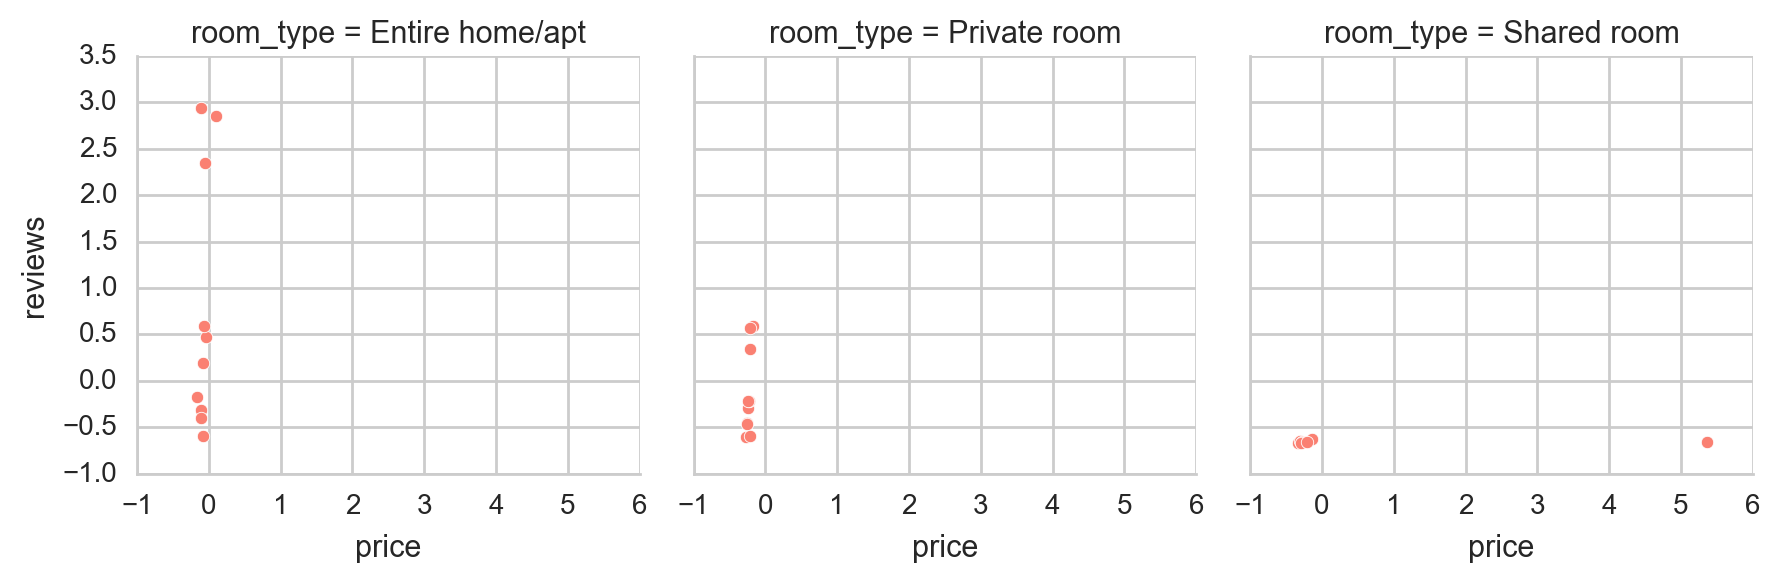

In [119]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [120]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(copenhagen.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [121]:
neighborhood_data.reset_index(inplace =True)

In [122]:
# define price

def price_color(neighborhood_data, row):
    
    price_max = np.max(neighborhood_data.price)
    price_min = np.min(neighborhood_data.price)
    
    
    if price_min <= neighborhood_data.ix[row, 'price'] < price_min + ((price_max - price_min)/3):
        return 'green'
    elif price_min + ((price_max - price_min)/3) <= neighborhood_data.ix[row, 'price'] < (price_min + 2*(price_max - price_min)/3):
        return 'orange'
    else:
        return 'red'

In [123]:
import folium

In [124]:
copenhagen_map = folium.Map(location=[55.676098, 12.568337])

for each_row in range(neighborhood_data.shape[0]):
     copenhagen_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [125]:
copenhagen_map

In [126]:
import json

In [127]:
with open('/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/copenhagen.geojson') as fp:

     geodata = json.load(fp)

In [128]:
for i in range(len(geodata['features'])):
    print geodata['features'][i]['properties']['name']

Indre By
Østerbro
Valby
Vesterbro-Kongens Enghave
Amager Øst
Brønshøj-Husum
Nørrebro
Bispebjerg
Vanløse
Amager Vest


In [129]:
neighborhood_coords = {}

for i in range(len(geodata['features'])):
    neighborhood_coords[geodata['features'][i]['properties']['name']] = geodata['features'][i]['geometry']['coordinates']

In [130]:
#geodata['features'][i]['geometry']['type']

In [131]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns = ['neighborhood', 'long_lat'])

In [132]:
neighborhood_coords.neighborhood

0                        Valby
1    Vesterbro-Kongens Enghave
2                      Vanløse
3                     Nørrebro
4                     Østerbro
5                  Amager Vest
6               Brønshøj-Husum
7                     Indre By
8                   Amager Øst
9                   Bispebjerg
Name: neighborhood, dtype: object

In [133]:
neighborhood_data.neighborhood

0                  Amager East
1                  Amager Vest
2                   Bispebjerg
3               Bronshoj-Husum
4                     Indre By
5                     Norrebro
6                     Osterbro
7                        Valby
8                      Vanlose
9    Vesterbro-Kongens Enghave
Name: neighborhood, dtype: object

In [134]:
neighborhood_coords.neighborhood.replace(u'Amager Øst',u'Amager East',inplace=True)
neighborhood_coords.neighborhood.replace(u'Brønshøj-Husum',u'Bronshoj-Husum',inplace=True)
neighborhood_coords.neighborhood.replace(u'Nørrebro',u'Norrebro',inplace=True)
neighborhood_coords.neighborhood.replace(u'Vanløse',u'Vanlose',inplace=True)
neighborhood_coords.neighborhood.replace(u'Østerbro',u'Osterbro',inplace=True)

In [135]:
neighborhood_coords.sort_values('neighborhood', inplace=True)

In [136]:
neighborhood_coords = neighborhood_coords.reset_index()

In [137]:
neighborhood_coords.drop('index', axis=1)

,neighborhood,long_lat
0,Amager East,"[[[[12.630936, 55.670503], [12.630896, 55.6706..."
1,Amager Vest,"[[[[12.582711, 55.668498], [12.582517, 55.6685..."
2,Bispebjerg,"[[[[12.515938, 55.706643], [12.516426, 55.7062..."
3,Bronshoj-Husum,"[[[[12.46894, 55.699755], [12.469353, 55.69965..."
4,Indre By,"[[[[12.611486, 55.697631], [12.611425, 55.6976..."
5,Norrebro,"[[[[12.561648, 55.696674], [12.562258, 55.7020..."
6,Osterbro,"[[[[12.615915, 55.720652], [12.611026, 55.7225..."
7,Valby,"[[[[12.524338, 55.66666], [12.523723, 55.66655..."
8,Vanlose,"[[[[12.46894, 55.699755], [12.466985, 55.70023..."
9,Vesterbro-Kongens Enghave,"[[[[12.544458, 55.640377], [12.544479, 55.6403..."


In [138]:
neighborhood_coords['longitude'] = 0
neighborhood_coords['latitude'] = 0

In [139]:
import shapely
from shapely.geometry import MultiPolygon, Point

In [140]:
# define the conversion function to convert the raw coordinates to coordinates for multipolygon

def PrepCoordsForShapely(rawcoords):
    preppedcoords = []
    #according to the geojson specs, a multipolygon is a list of linear rings, so we loop each
    for eachpolygon in rawcoords:
        #print eachpolygon
        #the first linear ring is the coordinates of the polygon, and shapely needs it to be a tuple
        tupleofcoords = tuple(eachpolygon[0])
        #the remaining linear rings, if any, are the coordinates of inner holes, and shapely needs these to be nested in a list
        if len(eachpolygon) > 1:
            listofholes = list(eachpolygon[1:])
        else:
            listofholes = []
        #shapely defines each polygon in a multipolygon with the polygoon coordinates and the list of holes nested inside a tuple
        eachpreppedpolygon = (tupleofcoords, listofholes)
        #so append each prepped polygon to the final multipolygon list
        preppedcoords.append(eachpreppedpolygon)
    #finally, the prepped coordinates need to be nested inside a list in order to be used as a star-argument for the MultiPolygon constructor.
    return [preppedcoords]



In [141]:
# Each neighborhood is made up of multiple polygons, first retrieve the coordinates 

for i in range(neighborhood_coords.shape[0]):
    rawcoords = neighborhood_coords["long_lat"][i]
    
    if geodata['features'][i]['geometry']['type'] == 'Polygon':
        poly = Polygon(neighborhood_coords.long_lat[i][0])
        neighborhood_coords.longitude[i] = poly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = poly.centroid.wkt.split()[2].split(')')[0]
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        neighborhood_coords.longitude[i] = multipoly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = multipoly.centroid.wkt.split()[2].split(')')[0]



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [142]:
neighborhood_coords.head(2)

,index,neighborhood,long_lat,longitude,latitude
0,8,Amager East,"[[[[12.630936, 55.670503], [12.630896, 55.6706...",12.62559970728424,55.66335612453906
1,5,Amager Vest,"[[[[12.582711, 55.668498], [12.582517, 55.6685...",12.572175424248,55.63869352376447


In [143]:
path = '/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/copenhagen.geojson'


nbrhd_map = folium.Map(location=[55.676098, 12.568337],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [144]:
for each_row in range(neighborhood_data.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [145]:
nbrhd_map

In [146]:
import xmltodict

In [147]:
with open("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/JJ_cop_metro.kml") as fp:

    rd_metro = xmltodict.parse(fp)

In [148]:
#rd_metro['kml']['Document']['Folder']['Placemark']

In [149]:
metro_dict = {}

for point in rd_metro['kml']['Document']['Folder']['Placemark']:
    metro_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [150]:
cop_metro = pd.DataFrame(metro_dict.items(), columns =['metro_stn','coordinates'])
cop_metro.head(2)

,metro_stn,coordinates
0,Lergravsparken St. (Metro),"[12.616416800000025, 55.6621014, 0.0]"
1,Lufthavnen,"[12.649389499999984, 55.6301375, 0.0]"


In [151]:
cop_metro['longitude'] = cop_metro['coordinates'].map(lambda x: float(x[0]))
cop_metro['latitude'] = cop_metro['coordinates'].map(lambda x: float(x[1]))

In [152]:
cop_metro.head(2)

,metro_stn,coordinates,longitude,latitude
0,Lergravsparken St. (Metro),"[12.616416800000025, 55.6621014, 0.0]",12.616417,55.662101
1,Lufthavnen,"[12.649389499999984, 55.6301375, 0.0]",12.649389,55.630137


In [153]:
for each_row in range(cop_metro.shape[0]):
     nbrhd_map.circle_marker(location = [cop_metro.ix[each_row,'latitude'],cop_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [154]:
nbrhd_map

In [155]:
# create polygon based on polygon or multipolygon type

def polygon_create(polygon_coords, row):

    
    rawcoords = polygon_coords["long_lat"][row]
    
    if geodata['features'][row]['geometry']['type'] == 'Polygon':
        poly = Polygon(rawcoords[0])
    
        return poly
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        return multipoly
    

In [156]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = polygon_create(polygon_coords, row)
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict

In [157]:
metrostn_count = dot_count(neighborhood_coords, cop_metro)

In [158]:
metrostn_count = pd.DataFrame(metrostn_count.items(),columns=['neighborhood','stn_count'])

In [159]:
metrostn_count.sort_values('neighborhood',inplace=True)

In [160]:
metrostn_count = metrostn_count.reset_index()

In [161]:
metrostn_count

,index,neighborhood,stn_count
0,9,Amager East,5
1,4,Amager Vest,6
2,8,Bispebjerg,0
3,6,Bronshoj-Husum,0
4,7,Indre By,3
5,5,Norrebro,0
6,2,Osterbro,0
7,0,Valby,0
8,3,Vanlose,1
9,1,Vesterbro-Kongens Enghave,1


In [162]:
import xmltodict

In [163]:
with open("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Copenhagen_Restaurant_Map.kml") as rp:

    rd = xmltodict.parse(rp)

In [164]:
rd['kml']

OrderedDict([(u'@xmlns', u'http://www.opengis.net/kml/2.2'),
             (u'Document',
              OrderedDict([(u'name', u'Copenhagen_Restaurant_Map'),
                           (u'description', u'Copenhagen Restaurants'),
                           (u'Folder',
                            OrderedDict([(u'name', u'Ikke-navngivet lag'),
                                         (u'Placemark',
                                          [OrderedDict([(u'name',
                                                         u'Restaurant Dalaman'),
                                                        (u'description',
                                                         u'Vodroffsvej 15<br>1900 Frederiksberg C, Denmark'),
                                                        (u'styleUrl',
                                                         u'#icon-22'),
                                                        (u'Point',
                                                         Ordered

In [165]:
rest_dict = {}

for point in rd['kml']['Document']['Folder']['Placemark']:
    rest_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [166]:
rest_data = pd.DataFrame(rest_dict.items(), columns =['rest_name','coordinates'])
rest_data.head(2)

,rest_name,coordinates
0,The Ricemarket,"[12.574476000000004, 55.682817, 0.0]"
1,Lagkagehuset,"[12.573523799999975, 55.682958, 0.0]"


In [167]:
rest_data['longitude'] = rest_data['coordinates'].map(lambda x: float(x[0]))
rest_data['latitude'] = rest_data['coordinates'].map(lambda x: float(x[1]))

In [168]:
rest_data.head(2)

,rest_name,coordinates,longitude,latitude
0,The Ricemarket,"[12.574476000000004, 55.682817, 0.0]",12.574476,55.682817
1,Lagkagehuset,"[12.573523799999975, 55.682958, 0.0]",12.573524,55.682958


In [169]:
rest_count = dot_count(neighborhood_coords, rest_data)

In [170]:
rest_count = pd.DataFrame(rest_count.items(), columns=['neighborhood','rest_count'])

In [171]:
rest_count.sort_values('neighborhood', inplace=True)

In [172]:
rest_count

,neighborhood,rest_count
9,Amager East,2
4,Amager Vest,1
8,Bispebjerg,1
6,Bronshoj-Husum,0
7,Indre By,89
5,Norrebro,6
2,Osterbro,5
0,Valby,0
3,Vanlose,1
1,Vesterbro-Kongens Enghave,5


In [173]:
path = '/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/copenhagen.geojson'


restaurant_map = folium.Map(location=[55.676098, 12.568337],
                    zoom_start=12)
restaurant_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [174]:
for each_row in range(neighborhood_data.shape[0]):
     restaurant_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [175]:
for each_row in range(rest_data.shape[0]):
     restaurant_map.circle_marker(location = [rest_data.ix[each_row,'latitude'],rest_data.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'fuchsia',line_color = 'fuchsia',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [176]:
restaurant_map